In [1]:
from xml.etree import ElementTree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
import os
path = '../data/'
folders = os.listdir('../data')
folders

['Test_E (1).xml',
 'Test_E (10).xml',
 'Test_E (100).xml',
 'Test_E (101).xml',
 'Test_E (102).xml',
 'Test_E (103).xml',
 'Test_E (104).xml',
 'Test_E (105).xml',
 'Test_E (106).xml',
 'Test_E (107).xml',
 'Test_E (108).xml',
 'Test_E (109).xml',
 'Test_E (11).xml',
 'Test_E (110).xml',
 'Test_E (111).xml',
 'Test_E (112).xml',
 'Test_E (113).xml',
 'Test_E (114).xml',
 'Test_E (115).xml',
 'Test_E (116).xml',
 'Test_E (117).xml',
 'Test_E (118).xml',
 'Test_E (119).xml',
 'Test_E (12).xml',
 'Test_E (120).xml',
 'Test_E (121).xml',
 'Test_E (122).xml',
 'Test_E (123).xml',
 'Test_E (124).xml',
 'Test_E (125).xml',
 'Test_E (126).xml',
 'Test_E (127).xml',
 'Test_E (128).xml',
 'Test_E (129).xml',
 'Test_E (13).xml',
 'Test_E (130).xml',
 'Test_E (131).xml',
 'Test_E (132).xml',
 'Test_E (133).xml',
 'Test_E (134).xml',
 'Test_E (135).xml',
 'Test_E (136).xml',
 'Test_E (137).xml',
 'Test_E (138).xml',
 'Test_E (139).xml',
 'Test_E (14).xml',
 'Test_E (140).xml',
 'Test_E (141).xml',

In [3]:
data_list = []
k1 = 0
k2 = 0
k3 = 0

for files in folders:
    file_name = files
    #print(file_name)
    file_na_path = path + file_name # 파일경로 + 파일명 지정 
    if "Train_E" in file_name: # 파일구분추가 
        gubun = "Train_E"
        normal_YN = 1
        k1 = k1+1
    elif "Train_NoE" in file_name:
        gubun = "Train_NoE"
        normal_YN = 0 
        k2 = k2+1
    elif "Test_E" in file_name:    
        gubun = "Test_E"
        normal_YN = 1
        k3 = k3+1
    else :
        gubun = "error"
    #print(file_name)
    tree = ElementTree.parse(file_na_path)    # xml파일을 파싱하기 위해 트리구조 생성 
   # print(file_na_path,file_name,gubun,tree)
    root = tree.getroot()
   # print("root : ",root.tag)
  #  print(file_name)
    if root.tag == "BTypeECG" : # root의 tag에 따라 파싱하는 tag값이 달라져 처리 
        #print("BTypeECG" ,file_name)
        for item in root.findall('PatientInfo') :
            #print(file_name)
            user_id = item.find('PatientID').text
            user_gender = item.find('PatientSEX').text
            user_age = item.find('PatientAge').text
            for item in root.findall('StudyInfo/ShortmeasSegment'):
                user_heartrate = item.find('Heartrate').text                
            for item in root.findall('StudyInfo/RecordData') :
                wave_name = item.find('Channel').text
                wave_data = item.find('Waveform/Data').text
                if wave_name == 'I':
                    wave_data_1 = wave_data.split(" ")
                if wave_name == 'II':
                    wave_data_2 = wave_data.split(" ") 
                if wave_name == 'III':
                    wave_data_3 = wave_data.split(" ")  
                if wave_name == 'aVR':
                    wave_data_4 = wave_data.split(" ")
                if wave_name == 'aVL':
                    wave_data_5 = wave_data.split(" ")
                if wave_name == 'aVF':
                    wave_data_6 = wave_data.split(" ")   
                if wave_name == 'V1':
                    wave_data_7 = wave_data.split(" ")
                if wave_name == 'V2':
                    wave_data_8 = wave_data.split(" ")
                if wave_name == 'V3':
                    wave_data_9 = wave_data.split(" ")  
                if wave_name == 'V4':
                    wave_data_10 = wave_data.split(" ")
                if wave_name == 'V5':
                    wave_data_11 = wave_data.split(" ") 
                if wave_name == 'V6':
                    wave_data_12 = wave_data.split(" ")   
            data_f = pd.DataFrame({
                     'file_gubun' : [gubun], # 파일구분
                     'normal_YN' : [normal_YN], # 정상여부 1:비정상 0: 정상 
                     'user_id' : [user_id],# user_id 
                     'user_gender' : [user_gender],#성별
                     'user_age'  : [user_age], # 나이 
                     'user_heartrate' : [user_heartrate], # 박동수
                     'I' : [wave_data_1], # 검사종류1
                     'II' : [wave_data_2], # 검사종류2
                     'III' : [wave_data_3], # 검사종류3
                     'aVR' : [wave_data_4], # 검사종류4
                     'aVL' : [wave_data_5], # 검사종류5
                     'aVF' : [wave_data_6], # 검사종류6
                     'V1' : [wave_data_7], # 검사종류7
                     'V2' : [wave_data_8], # 검사종류8
                     'V3' : [wave_data_9], # 검사종류9
                     'V4' : [wave_data_10], # 검사종류10
                     'V5' : [wave_data_11], # 검사종류11
                     'V6' : [wave_data_12] # 검사종류12
                 })
            data_list.append(data_f)
        data_fin = pd.concat(data_list)
       
    elif root.tag == "INFINITT_CIS" :
        for item in root.findall('PatientInfo') :
            #rint(item)
            user_id = item.find('ID').text
            user_gender = item.find('Gender').text
            user_age = item.find('Age').text
            for item in root.findall('Examination'):
                user_heartrate = item.find('HeartRate').text
            for item in root.findall('WaveInfo/WaveData') :
                wave_name = item.find('Name').text
                wave_data =  item.find('Data').text
                if wave_name == 'I':
                    wave_data_1 = wave_data.split(",")
                if wave_name == 'II':
                    wave_data_2 = wave_data.split(",") 
                if wave_name == 'III':
                    wave_data_3 = wave_data.split(",")  
                if wave_name == 'aVR':
                    wave_data_4 = wave_data.split(",")
                if wave_name == 'aVL':
                    wave_data_5 = wave_data.split(",")
                if wave_name == 'aVF':
                    wave_data_6 = wave_data.split(",")   
                if wave_name == 'V1':
                    wave_data_7 = wave_data.split(",")
                if wave_name == 'V2':
                    wave_data_8 = wave_data.split(",")
                if wave_name == 'V3':
                    wave_data_9 = wave_data.split(",")  
                if wave_name == 'V4':
                    wave_data_10 = wave_data.split(",")
                if wave_name == 'V5':
                    wave_data_11 = wave_data.split(",")
                if wave_name == 'V6':
                    wave_data_12 = wave_data.split(",")  
            data_f = pd.DataFrame({
                     'file_gubun' : [gubun], # 파일구분
                     'normal_YN' : [normal_YN], # 정상여부 1:비정상 0: 정상 
                     'user_id' : [user_id],# user_id 
                     'user_gender' : [user_gender],#성별
                     'user_age'  : [user_age], # 나이 
                     'user_heartrate' : [user_heartrate], # 박동수
                     'I' : [wave_data_1], # 검사종류1
                     'II' : [wave_data_2], # 검사종류2
                     'III' : [wave_data_3], # 검사종류3
                     'aVR' : [wave_data_4], # 검사종류4
                     'aVL' : [wave_data_5], # 검사종류5
                     'aVF' : [wave_data_6], # 검사종류6
                     'V1' : [wave_data_7], # 검사종류7
                     'V2' : [wave_data_8], # 검사종류8
                     'V3' : [wave_data_9], # 검사종류9
                     'V4' : [wave_data_10], # 검사종류10
                     'V5' : [wave_data_11], # 검사종류11
                     'V6' : [wave_data_12] # 검사종류12
                 })
            #print(data_f)
            data_list.append(data_f)
        data_fin = pd.concat(data_list)   
    else : # root.tag로 분류되지 않는 데이터셋 출력 
        print("error : ", file_name,root.tag )
print(data_fin)
print("k1",k1,"k2",k2,"k3",k3)

error :  Test_E (11).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (12).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (15).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (20).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (22).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (29).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (31).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (32).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (33).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (34).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (35).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (36).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (37).xml {http://www3.medical.philips.com}restingecgdata
error :  Test_E (38).xml {http://www3.medical.phili

In [4]:
data_fin.head(3)

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, ...","[3, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 5, ...","[1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, ...","[-2, -3, -2, -3, -2, -3, -2, -2, -3, -2, -2, -...","[0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1,...","[2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, ...","[3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-16, -15, -15, -14, -15, -15, -15, -15, -15, ...","[8, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, ...","[1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1...","[0, 1, 1, 2, 2, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0...","[6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
0,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
0,Test_E,1,11021948,Male,66,61,"[1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, ...","[2, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 8, 8, 8, ...","[1, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, ...","[-2, -4, -5, -5, -5, -6, -6, -7, -8, -8, -8, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 4, 4, 4, 4, 5, 6, 6, 7, 7, 7, 7, 6, 6, 6, ...","[-3, -7, -7, -7, -7, -8, -7, -7, -8, -8, -8, -...","[-2, -4, -5, -5, -5, -5, -5, -6, -6, -7, -7, -...","[0, 1, 1, 1, 1, 1, 1, 0, 0, -2, -3, -3, -3, -4...","[0, 0, 1, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 4, 4, ...","[0, 0, 0, 0, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, ..."


In [5]:
# index reset
data_fin.reset_index(drop=True, inplace=True)

In [6]:
data_fin.index

RangeIndex(start=0, stop=903, step=1)

In [7]:
data_fin.head(3)

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, ...","[3, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 5, ...","[1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, ...","[-2, -3, -2, -3, -2, -3, -2, -2, -3, -2, -2, -...","[0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1,...","[2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, ...","[3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-16, -15, -15, -14, -15, -15, -15, -15, -15, ...","[8, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, ...","[1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1...","[0, 1, 1, 2, 2, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0...","[6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, ...","[2, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 8, 8, 8, ...","[1, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, ...","[-2, -4, -5, -5, -5, -6, -6, -7, -8, -8, -8, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 4, 4, 4, 4, 5, 6, 6, 7, 7, 7, 7, 6, 6, 6, ...","[-3, -7, -7, -7, -7, -8, -7, -7, -8, -8, -8, -...","[-2, -4, -5, -5, -5, -5, -5, -6, -6, -7, -7, -...","[0, 1, 1, 1, 1, 1, 1, 0, 0, -2, -3, -3, -3, -4...","[0, 0, 1, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 4, 4, ...","[0, 0, 0, 0, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, ..."


In [8]:
# data frame copy 
df = data_fin.copy()
df.head(3)

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, ...","[3, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 5, ...","[1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, ...","[-2, -3, -2, -3, -2, -3, -2, -2, -3, -2, -2, -...","[0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1,...","[2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, ...","[3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-16, -15, -15, -14, -15, -15, -15, -15, -15, ...","[8, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, ...","[1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1...","[0, 1, 1, 2, 2, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0...","[6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, ...","[2, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 8, 8, 8, ...","[1, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, ...","[-2, -4, -5, -5, -5, -6, -6, -7, -8, -8, -8, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 4, 4, 4, 4, 5, 6, 6, 7, 7, 7, 7, 6, 6, 6, ...","[-3, -7, -7, -7, -7, -8, -7, -7, -8, -8, -8, -...","[-2, -4, -5, -5, -5, -5, -5, -6, -6, -7, -7, -...","[0, 1, 1, 1, 1, 1, 1, 0, 0, -2, -3, -3, -3, -4...","[0, 0, 1, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 4, 4, ...","[0, 0, 0, 0, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, ..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_gubun      903 non-null    object
 1   normal_YN       903 non-null    int64 
 2   user_id         903 non-null    object
 3   user_gender     859 non-null    object
 4   user_age        842 non-null    object
 5   user_heartrate  903 non-null    object
 6   I               903 non-null    object
 7   II              903 non-null    object
 8   III             903 non-null    object
 9   aVR             903 non-null    object
 10  aVL             903 non-null    object
 11  aVF             903 non-null    object
 12  V1              903 non-null    object
 13  V2              903 non-null    object
 14  V3              903 non-null    object
 15  V4              903 non-null    object
 16  V5              903 non-null    object
 17  V6              903 non-null    object
dtypes: int64(1

In [11]:
df_1 = df['I']
df_1 = df_1.apply(pd.to_numeric)
df_1

0      [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...
1      [-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...
2      [1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...
3      [1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ...
4      [-10.0, -22.0, -23.0, -23.0, -22.0, -22.0, -22...
                             ...                        
898    [79, -10, -18, -20, -20, -20, -21, -21, -21, -...
899    [-33, 4, 14, 16, 18, 20, 20, 22, 24, 24, 24, 2...
900    [7, -38, -43, -45, -47, -48, -49, -50, -51, -5...
901    [3, 7, 6, 5, 6, 7, 7, 7, 8, 8, 7, 6, 6, 6, 6, ...
902    [83, 2, -2, -3, -3, -3, -3, -3, -3, -3, -3, -3...
Name: I, Length: 903, dtype: object

In [12]:
df_2 = df['II']
df_2 = df_2.apply(pd.to_numeric)
df_2.head(2)

0    [3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...
Name: II, dtype: object

In [13]:
df_3 = df['III']
df_3 = df_3.apply(pd.to_numeric)
df_3.head(2)

df_4 = df['aVR']
df_4 = df_4.apply(pd.to_numeric)
df_4.head(2)

df_5 = df['aVL']
df_5 = df_5.apply(pd.to_numeric)
df_5.head(2)

df_6 = df['aVF']
df_6 = df_6.apply(pd.to_numeric)
df_6.head(2)

df_7 = df['V1']
df_7 = df_7.apply(pd.to_numeric)
df_7.head(2)

df_8 = df['V2']
df_8 = df_8.apply(pd.to_numeric)
df_8.head(2)

df_9 = df['V3']
df_9 = df_9.apply(pd.to_numeric)
df_9.head(2)

df_10 = df['V4']
df_10 = df_10.apply(pd.to_numeric)
df_10.head(2)

df_11 = df['V5']
df_11 = df_11.apply(pd.to_numeric)
df_11.head(2)

df_12 = df['V6']
df_12 = df_12.apply(pd.to_numeric)
df_12.head(2)


0    [6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...
1    [-5, -13, -15, -17, -17, -19, -19, -19, -21, -...
Name: V6, dtype: object

In [14]:
#  number형으로 변경한 값으로 변경 
df = pd.merge(df.drop('I',axis=1),df_1,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('II',axis=1),df_2,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('III',axis=1),df_3,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('aVR',axis=1),df_4,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('aVL',axis=1),df_5,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('aVF',axis=1),df_6,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('V1',axis=1),df_7,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('V2',axis=1),df_8,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('V3',axis=1),df_9,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('V4',axis=1),df_10,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('V5',axis=1),df_11,left_index=True,right_index=True,how='inner')

df = pd.merge(df.drop('V6',axis=1),df_12,left_index=True,right_index=True,how='inner')
df.head(3)

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...","[3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, ...","[1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, ...","[-2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -2....","[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, ...","[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-16.0, -15.0, -15.0, -14.0, -15.0, -15.0, -15...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...","[0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, -1.0, -1.0...","[6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 9.0, ...","[1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[-2.0, -4.0, -5.0, -5.0, -5.0, -6.0, -6.0, -7....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 7.0, ...","[-3.0, -7.0, -7.0, -7.0, -7.0, -8.0, -7.0, -7....","[-2.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5.0, -6....","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, ..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_gubun      903 non-null    object
 1   normal_YN       903 non-null    int64 
 2   user_id         903 non-null    object
 3   user_gender     859 non-null    object
 4   user_age        842 non-null    object
 5   user_heartrate  903 non-null    object
 6   I               903 non-null    object
 7   II              903 non-null    object
 8   III             903 non-null    object
 9   aVR             903 non-null    object
 10  aVL             903 non-null    object
 11  aVF             903 non-null    object
 12  V1              903 non-null    object
 13  V2              903 non-null    object
 14  V3              903 non-null    object
 15  V4              903 non-null    object
 16  V5              903 non-null    object
 17  V6              903 non-null    object
dtypes: int64(1

In [16]:
a = df['I'].iloc[0]

print(np.isnan(a))

[False False False ... False False  True]


In [17]:
df['I'].size

903

In [18]:
# 결측치 값이 존재해서 삭제 
import math
for i in range (0,903):
    mylist1 = df['I'].iloc[i]
    df['I'].iloc[i] = [x for x in mylist1 if math.isnan(x) == False]
    
    mylist2 = df['II'].iloc[i]
    df['II'].iloc[i] = [x for x in mylist2 if math.isnan(x) == False]
    
    mylist3 = df['III'].iloc[i]
    df['III'].iloc[i] = [x for x in mylist3 if math.isnan(x) == False]
    
    mylist4 = df['aVR'].iloc[i]
    df['aVR'].iloc[i] = [x for x in mylist4 if math.isnan(x) == False]

    mylist5 = df['aVL'].iloc[i]
    df['aVL'].iloc[i] = [x for x in mylist5 if math.isnan(x) == False]

    mylist6 = df['aVF'].iloc[i]
    df['aVF'].iloc[i] = [x for x in mylist6 if math.isnan(x) == False]    

    mylist7 = df['V1'].iloc[i]
    df['V1'].iloc[i] = [x for x in mylist7 if math.isnan(x) == False]   
 
    mylist8 = df['V2'].iloc[i]
    df['V2'].iloc[i] = [x for x in mylist8 if math.isnan(x) == False] 
    
    mylist9 = df['V3'].iloc[i]
    df['V3'].iloc[i] = [x for x in mylist9 if math.isnan(x) == False] 

    mylist10 = df['V4'].iloc[i]
    df['V4'].iloc[i] = [x for x in mylist10 if math.isnan(x) == False]     

    mylist11 = df['V5'].iloc[i]
    df['V5'].iloc[i] = [x for x in mylist11 if math.isnan(x) == False] 
   
    mylist12 = df['V6'].iloc[i]
    df['V6'].iloc[i] = [x for x in mylist12 if math.isnan(x) == False]

C:\Users\82109\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
# 전처리 완료된 파일 생성해서 결측치 확인, 및 검증 
#df.to_excel(excel_writer='20210731_df.xlsx')

In [20]:
df.columns

Index(['file_gubun', 'normal_YN', 'user_id', 'user_gender', 'user_age',
       'user_heartrate', 'I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2',
       'V3', 'V4', 'V5', 'V6'],
      dtype='object')

In [21]:
# 길이 맞추기 
features = df.columns[6:18]
print(features)
cropping = [] 
for feature in features:
    c = df[feature].apply(lambda x: len(x)).min()
    cropping.append(c)
    print(f'{feature} :', c)

Index(['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5',
       'V6'],
      dtype='object')
I : 4999
II : 4999
III : 4999
aVR : 4999
aVL : 4999
aVF : 4999
V1 : 4999
V2 : 4999
V3 : 4999
V4 : 4999
V5 : 4999
V6 : 4999


In [22]:
print( df['I'][0:4999])

0      [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...
1      [-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...
2      [1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...
3      [1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ...
4      [-10.0, -22.0, -23.0, -23.0, -22.0, -22.0, -22...
                             ...                        
898    [79, -10, -18, -20, -20, -20, -21, -21, -21, -...
899    [-33, 4, 14, 16, 18, 20, 20, 22, 24, 24, 24, 2...
900    [7, -38, -43, -45, -47, -48, -49, -50, -51, -5...
901    [3, 7, 6, 5, 6, 7, 7, 7, 8, 8, 7, 6, 6, 6, 6, ...
902    [83, 2, -2, -3, -3, -3, -3, -3, -3, -3, -3, -3...
Name: I, Length: 903, dtype: object


In [23]:
for i in range (0,903):
    df['I'].iloc[i] = df['I'].iloc[i][0:4999]
    df['II'].iloc[i] = df['II'].iloc[i][0:4999]
    df['III'].iloc[i] = df['III'].iloc[i][0:4999]
    df['aVR'].iloc[i] = df['aVR'].iloc[i][0:4999]
    df['aVL'].iloc[i] = df['aVL'].iloc[i][0:4999]
    df['aVF'].iloc[i] = df['aVF'].iloc[i][0:4999]
    df['V1'].iloc[i] = df['V1'].iloc[i][0:4999]
    df['V2'].iloc[i] = df['V2'].iloc[i][0:4999]
    df['V3'].iloc[i] = df['V3'].iloc[i][0:4999]
    df['V4'].iloc[i] = df['V4'].iloc[i][0:4999]
    df['V5'].iloc[i] = df['V5'].iloc[i][0:4999]
    df['V6'].iloc[i] = df['V6'].iloc[i][0:4999]

In [24]:
# 길이 보기 
ta = df.aVF.apply(lambda x: len(x))
ta.describe

<bound method NDFrame.describe of 0      4999
1      4999
2      4999
3      4999
4      4999
       ... 
898    4999
899    4999
900    4999
901    4999
902    4999
Name: aVF, Length: 903, dtype: int64>

In [25]:
df_train = df.copy()

In [26]:
df

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...","[3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, ...","[1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, ...","[-2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -2....","[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, ...","[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-16.0, -15.0, -15.0, -14.0, -15.0, -15.0, -15...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...","[0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, -1.0, -1.0...","[6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 9.0, ...","[1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[-2.0, -4.0, -5.0, -5.0, -5.0, -6.0, -6.0, -7....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 7.0, ...","[-3.0, -7.0, -7.0, -7.0, -7.0, -8.0, -7.0, -7....","[-2.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5.0, -6....","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, ..."
3,Test_E,1,11024688,Male,39,87,"[1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ...","[3.0, 7.0, 8.0, 8.0, 9.0, 8.0, 7.0, 7.0, 6.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, ...","[-2.0, -5.0, -5.0, -6.0, -6.0, -6.0, -5.0, -5....","[0.0, -1.0, -1.0, -1.0, -2.0, -2.0, -2.0, -2.0...","[3.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.0, -3.0, -3.0, -3.0, -4.0, -5.0, -5.0, -6....","[-6.0, -14.0, -15.0, -16.0, -17.0, -18.0, -19....","[-8.0, -17.0, -19.0, -20.0, -21.0, -22.0, -23....","[-10.0, -21.0, -23.0, -24.0, -25.0, -26.0, -26...","[-4.0, -9.0, -10.0, -11.0, -11.0, -12.0, -12.0..."
4,Test_E,1,04014454,None,None,59,"[-10.0, -22.0, -23.0, -23.0, -22.0, -22.0, -22...","[-12.0, -27.0, -29.0, -29.0, -30.0, -32.0, -32...","[-3.0, -6.0, -6.0, -8.0, -9.0, -10.0, -10.0, -...","[11.0, 24.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27....","[-3.0, -8.0, -8.0, -8.0, -7.0, -7.0, -7.0, -7....","[-7.0, -16.0, -17.0, -18.0, -19.0, -20.0, -20....","[-8.0, -17.0, -19.0, -19.0, -20.0, -20.0, -21....","[-9.0, -21.0, -23.0, -24.0, -25.0, -25.0, -26....","[-7.0, -16.0, -17.0, -18.0, -18.0, -19.0, -20....","[-13.0, -29.0, -32.0, -33.0, -33.0, -34.0, -35...","[-2.0, -4.0, -5.0, -5.0, -6.0, -7.0, -8.0, -8....","[8.0, 16.0, 18.0, 18.0, 17.0, 16.0, 15.0, 14.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,Train_NoE,0,03916884,Female,72,81,"[79, -10, -18, -20, -20, -20, -21, -21, -21, -...","[-11, 14, 18, 20, 21, 23, 25, 25, 25, 25, 25, ...","[-100, 32, 42, 45, 45, 47, 50, 50, 49, 48, 48,...","[-26, -12, -9, -7, -6, -6, -6, -6, -6, -6, -6,...","[89, -22, -30, -33, -33, -34, -35, -35, -35, -...","[-55, 24, 31, 33, 34, 36, 38, 38, 38, 38, 38, ...","[-31, 6, 11, 14, 15, 15, 15, 16, 18, 19, 19, 1...","[-61, 11, 18, 22, 24, 26, 27, 29, 31, 33, 34, ...","[-310, 32, 53, 56, 58, 59, 60, 62, 64, 67, 69,...","[-269, -30, -17, -14, -13, -13,

In [27]:
# 전체 데이터에서 train데이터만 추출 ## 보기 
df_train = df_train[df['file_gubun'].isin(['Train_NoE','Train_E'])]

In [28]:
# index reset
df_train.reset_index(drop=True, inplace=True)

In [29]:
df_train

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Train_E,1,00922763,Male,61,61,"[0, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, -1, -1...","[0, 0, -1, -1, -2, -1, -1, -1, -1, -2, -2, -2,...","[0, 0, 0, 0, -1, -1, -2, -2, -2, -1, -1, -1, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Train_E,1,07107840,Male,47,61,"[10, 26, 36, 40, 44, 54, 76, 100, 122, 138, 15...","[54, 68, 82, 96, 94, 66, 28, 8, -3, -11, -13, ...","[44, 42, 46, 54, 50, 10, -47, -91, -125, -149,...","[-31, -47, -59, -69, -69, -61, -53, -55, -59, ...","[-17, -7, -5, -7, -3, 22, 62, 96, 124, 144, 15...","[48, 56, 66, 76, 72, 38, -7, -39, -63, -79, -8...","[2, -29, -61, -105, -147, -185, -225, -257, -2...","[10, -39, -111, -193, -277, -343, -397, -435, ...","[38, 4, -49, -115, -185, -247, -295, -319, -32...","[60, 54, 30, -5, -51, -101, -139, -155, -157, ...","[64, 76, 74, 62, 36, 4, -17, -25, -23, -13, 4,...","[62, 80, 92, 96, 92, 76, 68, 70, 74, 84, 96, 1..."
2,Train_E,1,07107840,Male,47,52,"[-1, -3, -1, 0, 2, 0, 0, 0, -1, -1, -1, -1, -5...","[-5, -7, -7, -5, -3, -5, -7, -5, -5, -5, -3, -...","[-1, -1, -3, -5, -3, -5, -7, -7, -3, -1, -1, -...","[6, 8, 6, 4, 2, 4, 4, 4, 6, 4, 4, 6, 6, 6, 6, ...","[0, -1, 0, 2, 2, 2, 4, 2, 0, 0, 0, 0, 0, -1, 0...","[-5, -5, -7, -7, -7, -7, -9, -9, -5, -7, -5, -...","[8, 6, 6, 6, 8, 8, 6, 6, 6, 8, 6, 6, 6, 8, 6, ...","[12, 10, 10, 10, 12, 10, 10, 12, 12, 12, 12, 1...","[-1, -3, -3, -3, -1, -3, -3, -3, -3, -1, -1, -...","[12, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 1...","[-41, -41, -41, -39, -39, -39, -39, -39, -39, ...","[34, 32, 30, 32, 32, 30, 28, 28, 30, 28, 30, 3..."
3,Train_E,1,07107840,Male,47,53,"[10, 12, 14, 12, 12, 8, 8, 8, 10, 12, 12, 12, ...","[-1, 0, 0, -3, -7, -9, -7, -5, -1, 0, -1, -3, ...","[-11, -9, -13, -15, -17, -17, -13, -15, -13, -...","[-3, -5, -5, -3, -1, 0, 0, 0, -1, -5, -3, -3, ...","[12, 12, 14, 14, 14, 12, 10, 12, 14, 12, 14, 1...","[-5, -1, -5, -7, -9, -11, -9, -9, -7, -5, -5, ...","[-1, 2, 10, 10, 10, 8, 2, 0, 0, 0, 6, 8, 6, 8,...","[-39, -31, -25, -27, -25, -27, -33, -31, -33, ...","[-5, -3, 0, 0, 2, 0, -1, -1, -1, -1, 0, 0, 0, ...","[4, 6, 10, 8, 10, 12, 10, 10, 8, 8, 8, 8, 8, 1...","[16, 16, 18, 16, 20, 20, 20, 20, 18, 16, 18, 2...","[6, 8, 10, 10, 12, 10, 10, 10, 10, 8, 10, 12, ..."
4,Train_E,1,07107840,Male,49,53,"[-7, 0, 0, 0, 0, -3, -5, -7, -5, -1, 0, 0, -1,...","[-1, 0, 0, 0, -3, -5, -3, -7, -3, 0, -1, 0, -3...","[4, 2, 0, 0, -3, -1, 0, 0, 2, 2, 0, 0, -1, 0, ...","[6, 0, 0, 0, 2, 6, 6, 8, 6, 2, 2, 2, 2, 6, 4, ...","[-5, -1, 0, -1, 0, 0, -3, -3, -3, -3, 0, -1, 0...","[0, 0, 0, 0, -1, -3, -1, -1, 0, 0, 0, 0, -1, -...","[22, 22, 26, 26, 26, 28, 26, 24, 26, 26, 26, 2...","[16, 16, 20, 20, 20, 20, 18, 20, 18, 20, 18, 2...","[-21, -19, -17, -15, -13, -11, -13, -15, -15, ...","[-27, -25, -21, -23, -21, -21, -23, -23, -23, ...","[-29, -27, -25, -23, -23, -23, -25, -25, -25, ...","[-21, -19, -17, -17, -17, -15, -17, -17, -19, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,Train_NoE,0,03916884,Female,72,81,"[79, -10, -18, -20, -20, -20, -21, -21, -21, -...","[-11, 14, 18, 20, 21, 23, 25, 25, 25, 25, 25, ...","[-100, 32, 42, 45, 45, 47, 50, 50, 49, 48, 48,...","[-26, -12, -9, -7, -6, -6, -6, -6, -6, -6, -6,...","[89, -22, -30, -33, -33, -34, -35, -35, -35, -...","[-55, 24, 31, 33, 34, 36, 38, 38, 38, 38, 38, ...","[-31, 6, 11, 14, 15, 15, 15, 16, 18, 19, 19, 1...","[-61, 11, 18, 22, 24, 26, 27, 29, 31, 33, 34, ...","[-310, 32, 53, 56, 58, 59, 60, 62, 64, 67, 69,...","[-269, -30, -17, -14, -13, -13, 

In [30]:
# train하기 위해 데이터셋 생성 
df_train.head(2)

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Train_E,1,00922763,Male,61,61,"[0, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, -1, -1...","[0, 0, -1, -1, -2, -1, -1, -1, -1, -2, -2, -2,...","[0, 0, 0, 0, -1, -1, -2, -2, -2, -1, -1, -1, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Train_E,1,07107840,Male,47,61,"[10, 26, 36, 40, 44, 54, 76, 100, 122, 138, 15...","[54, 68, 82, 96, 94, 66, 28, 8, -3, -11, -13, ...","[44, 42, 46, 54, 50, 10, -47, -91, -125, -149,...","[-31, -47, -59, -69, -69, -61, -53, -55, -59, ...","[-17, -7, -5, -7, -3, 22, 62, 96, 124, 144, 15...","[48, 56, 66, 76, 72, 38, -7, -39, -63, -79, -8...","[2, -29, -61, -105, -147, -185, -225, -257, -2...","[10, -39, -111, -193, -277, -343, -397, -435, ...","[38, 4, -49, -115, -185, -247, -295, -319, -32...","[60, 54, 30, -5, -51, -101, -139, -155, -157, ...","[64, 76, 74, 62, 36, 4, -17, -25, -23, -13, 4,...","[62, 80, 92, 96, 92, 76, 68, 70, 74, 84, 96, 1..."


In [31]:
# train 진행할 컬럼만 추출함. label 은 정상 유무 1: 비정상 , 0 : 정상 
x_train = df_train[['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']]
y_train = df_train['normal_YN']

In [32]:
x_train

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,"[0, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, -1, -1...","[0, 0, -1, -1, -2, -1, -1, -1, -1, -2, -2, -2,...","[0, 0, 0, 0, -1, -1, -2, -2, -2, -1, -1, -1, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[10, 26, 36, 40, 44, 54, 76, 100, 122, 138, 15...","[54, 68, 82, 96, 94, 66, 28, 8, -3, -11, -13, ...","[44, 42, 46, 54, 50, 10, -47, -91, -125, -149,...","[-31, -47, -59, -69, -69, -61, -53, -55, -59, ...","[-17, -7, -5, -7, -3, 22, 62, 96, 124, 144, 15...","[48, 56, 66, 76, 72, 38, -7, -39, -63, -79, -8...","[2, -29, -61, -105, -147, -185, -225, -257, -2...","[10, -39, -111, -193, -277, -343, -397, -435, ...","[38, 4, -49, -115, -185, -247, -295, -319, -32...","[60, 54, 30, -5, -51, -101, -139, -155, -157, ...","[64, 76, 74, 62, 36, 4, -17, -25, -23, -13, 4,...","[62, 80, 92, 96, 92, 76, 68, 70, 74, 84, 96, 1..."
2,"[-1, -3, -1, 0, 2, 0, 0, 0, -1, -1, -1, -1, -5...","[-5, -7, -7, -5, -3, -5, -7, -5, -5, -5, -3, -...","[-1, -1, -3, -5, -3, -5, -7, -7, -3, -1, -1, -...","[6, 8, 6, 4, 2, 4, 4, 4, 6, 4, 4, 6, 6, 6, 6, ...","[0, -1, 0, 2, 2, 2, 4, 2, 0, 0, 0, 0, 0, -1, 0...","[-5, -5, -7, -7, -7, -7, -9, -9, -5, -7, -5, -...","[8, 6, 6, 6, 8, 8, 6, 6, 6, 8, 6, 6, 6, 8, 6, ...","[12, 10, 10, 10, 12, 10, 10, 12, 12, 12, 12, 1...","[-1, -3, -3, -3, -1, -3, -3, -3, -3, -1, -1, -...","[12, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 1...","[-41, -41, -41, -39, -39, -39, -39, -39, -39, ...","[34, 32, 30, 32, 32, 30, 28, 28, 30, 28, 30, 3..."
3,"[10, 12, 14, 12, 12, 8, 8, 8, 10, 12, 12, 12, ...","[-1, 0, 0, -3, -7, -9, -7, -5, -1, 0, -1, -3, ...","[-11, -9, -13, -15, -17, -17, -13, -15, -13, -...","[-3, -5, -5, -3, -1, 0, 0, 0, -1, -5, -3, -3, ...","[12, 12, 14, 14, 14, 12, 10, 12, 14, 12, 14, 1...","[-5, -1, -5, -7, -9, -11, -9, -9, -7, -5, -5, ...","[-1, 2, 10, 10, 10, 8, 2, 0, 0, 0, 6, 8, 6, 8,...","[-39, -31, -25, -27, -25, -27, -33, -31, -33, ...","[-5, -3, 0, 0, 2, 0, -1, -1, -1, -1, 0, 0, 0, ...","[4, 6, 10, 8, 10, 12, 10, 10, 8, 8, 8, 8, 8, 1...","[16, 16, 18, 16, 20, 20, 20, 20, 18, 16, 18, 2...","[6, 8, 10, 10, 12, 10, 10, 10, 10, 8, 10, 12, ..."
4,"[-7, 0, 0, 0, 0, -3, -5, -7, -5, -1, 0, 0, -1,...","[-1, 0, 0, 0, -3, -5, -3, -7, -3, 0, -1, 0, -3...","[4, 2, 0, 0, -3, -1, 0, 0, 2, 2, 0, 0, -1, 0, ...","[6, 0, 0, 0, 2, 6, 6, 8, 6, 2, 2, 2, 2, 6, 4, ...","[-5, -1, 0, -1, 0, 0, -3, -3, -3, -3, 0, -1, 0...","[0, 0, 0, 0, -1, -3, -1, -1, 0, 0, 0, 0, -1, -...","[22, 22, 26, 26, 26, 28, 26, 24, 26, 26, 26, 2...","[16, 16, 20, 20, 20, 20, 18, 20, 18, 20, 18, 2...","[-21, -19, -17, -15, -13, -11, -13, -15, -15, ...","[-27, -25, -21, -23, -21, -21, -23, -23, -23, ...","[-29, -27, -25, -23, -23, -23, -25, -25, -25, ...","[-21, -19, -17, -17, -17, -15, -17, -17, -19, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
641,"[79, -10, -18, -20, -20, -20, -21, -21, -21, -...","[-11, 14, 18, 20, 21, 23, 25, 25, 25, 25, 25, ...","[-100, 32, 42, 45, 45, 47, 50, 50, 49, 48, 48,...","[-26, -12, -9, -7, -6, -6, -6, -6, -6, -6, -6,...","[89, -22, -30, -33, -33, -34, -35, -35, -35, -...","[-55, 24, 31, 33, 34, 36, 38, 38, 38, 38, 38, ...","[-31, 6, 11, 14, 15, 15, 15, 16, 18, 19, 19, 1...","[-61, 11, 18, 22, 24, 26, 27, 29, 31, 33, 34, ...","[-310, 32, 53, 56, 58, 59, 60, 62, 64, 67, 69,...","[-269, -30, -17, -14, -13, -13, -13, -12, -11,...","[-17, -17, -17, -17, -17, -17, -17, -17, -17, ...","[-15, -21, -23, -24, -25, -25, -25, -26, -26, ..."
642,"[-33, 4, 14, 16, 18, 20, 20, 22, 24, 24, 24, 2...","[-135, -3, 20, 24, 26, 30, 32, 34, 36, 36, 36,...","[-91, -15, 0, 4, 6, 8, 8, 10, 10, 10, 10,

In [33]:
# 상관 분석을 위해 중복을 제거한 data set 생성 
df_corr =  df[['normal_YN','user_gender','user_age','user_heartrate']]
df_corr=df_corr.drop_duplicates()
df_corr = df_corr.dropna(axis=0)
df_corr['sex'] = 0
df_corr['sex'] = np.where(df_corr['user_gender'] == 'Female', 1, 0)
df_corr['age'] = 0
df_corr['age'] = np.where(df_corr['user_age'].str.contains('yr'), 0, df_corr['user_age'])
df_corr = df_corr.astype({'user_gender':'string','age':int,'user_heartrate':int})
df_corr.dtypes
# 상관관계 분석 
corr = df_corr.corr(method = 'pearson')
corr

,normal_YN,user_heartrate,sex,age
normal_YN,1.000000,0.028792,0.000567,-0.242015
user_heartrate,0.028792,1.000000,0.084367,-0.007002
sex,0.000567,0.084367,1.000000,0.182571
age,-0.242015,-0.007002,0.182571,1.000000


In [34]:
# 2차원 배열로 만들기 위해서 합치기 
x_train_list_t = list()
for i in  x_train.index:
    train_l = x_train["I"][i] + x_train["II"][i] + x_train["III"][i] + x_train["aVR"][i] +x_train["aVL"][i] +x_train["aVF"][i]+ x_train["V1"][i]+x_train["V2"][i]+x_train["V3"][i]+x_train["V4"][i]+x_train["V5"][i]+x_train["V6"][i]
    x_train_list_t.append(train_l)
    

In [35]:
# 2차원 배열로 만들기 위해서 합치기 
#x_train_list_t1 = list()
#for i in  x_train.index:
#    for k in range (0,4998):
#        train_k = [x_train["I"][i][k] , x_train["II"][i][k] , x_train["III"][i][k] , x_train["aVR"][i][k] , x_train["aVL"][i][k] ,x_train["aVF"][i][k], x_train["V1"][i][k],x_train["V2"][i][k],x_train["V3"][i][k],x_train["V4"][i][k],x_train["V5"][i][k],x_train["V6"][i][k]]
#       # print(train_k)
#        #newlist =  newlist + train_k
#        train_k.extend(train_k)
#    x_train_list_t1.append(train_k)
    

In [36]:
print(np.array(x_train_list_t))

[[  0   0  -1 ...   0   0   0]
 [ 10  26  36 ... -47 -49 -51]
 [ -1  -3  -1 ... -39 -43 -45]
 ...
 [  7 -38 -43 ...  21  21  21]
 [  3   7   6 ... -14 -14 -14]
 [ 83   2  -2 ... -63 -63 -63]]


In [37]:
len(x_train_list_t[0])

59988

In [38]:
# 데이터 확인 완료 
x_train_list_t[645][4999:5010]

[175, 30, 23, 21, 19, 18, 17, 16, 16, 16, 16]

In [39]:
train_list_a = np.array(x_train_list_t)

In [40]:
train_list_a[645][10000:10010]

array([33, 28, 25, 23, 21, 19, 18, 18, 17, 15], dtype=int64)

In [41]:
#데이터 검증 완료 
len(train_list_a[645])

59988

In [42]:
#x_train.to_excel(excel_writer='x_train_20210804_1.xlsx')

In [43]:
train_list_a.shape

(646, 59988)

In [44]:
train_list_o = train_list_a.reshape(646,12,4999)

In [45]:
train_list_o.shape

(646, 12, 4999)

In [46]:
train_list_o

array([[[   0,    0,   -1, ...,    0,    0,    0],
        [   0,    0,   -1, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,   -2,   -2,   -2],
        [   0,    0,    0, ...,   -1,   -1,   -1],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[  10,   26,   36, ...,  -25,  -27,  -29],
        [  54,   68,   82, ...,  -49,  -49,  -47],
        [  44,   42,   46, ...,  -41,  -41,  -39],
        ...,
        [  60,   54,   30, ...,   -7,   -9,  -13],
        [  64,   76,   74, ...,  -29,  -31,  -33],
        [  62,   80,   92, ...,  -47,  -49,  -51]],

       [[  -1,   -3,   -1, ...,  -29,  -33,  -33],
        [  -5,   -7,   -7, ...,  -45,  -47,  -49],
        [  -1,   -1,   -3, ...,  -33,  -33,  -35],
        ...,
        [  12,   10,   10, ...,  -21,  -25,  -27],
        [ -41,  -41,  -41, ...,  -23,  -27,  -29],
        [  34,   32,   30, ...,  -39,  -43,  -45]],

       ...,

       [[   7,  -38,  -4

In [47]:
y_train.shape

(646,)

In [48]:
train_list_a

array([[  0,   0,  -1, ...,   0,   0,   0],
       [ 10,  26,  36, ..., -47, -49, -51],
       [ -1,  -3,  -1, ..., -39, -43, -45],
       ...,
       [  7, -38, -43, ...,  21,  21,  21],
       [  3,   7,   6, ..., -14, -14, -14],
       [ 83,   2,  -2, ..., -63, -63, -63]], dtype=int64)

In [49]:
train_list_over = train_list_a.reshape(7752,4999)

In [50]:
y_train.shape

(646,)

In [51]:
train_list_over.shape

(7752, 4999)

In [52]:
# 오버샘플링  d
# 2차원 배열로 들어가야함 %%%처리 어케 하는건지 모루겟음 
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(train_list_a, y_train)
#X_train_oversampled, y_train_oversampled = sm.fit_resample(train_list_over, y_train)

In [53]:
# 데이터 검증 완료 
X_train_oversampled[4][54989:55000]

array([-21, -19, -17, -17, -17, -15, -17, -17, -19, -17, -17], dtype=int64)

In [54]:
# 데이터 검증 완료 
X_train_oversampled[647][0:100]

array([ 0,  3,  6,  7,  9, 12, 17, 23, 29, 33, 36, 39, 41, 39, 35, 31, 27,
       23, 18, 13,  8,  5,  2,  0,  0,  0,  0, -1, -1, -1, -1, -1, -2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -2, -2, -2, -1,  0,  0,  0,  0,  0,  0,  1,  2,  2,  2,  2,  3,  3,
        4,  5,  5,  7,  8,  7,  7,  7,  8,  9, 10, 10, 11, 12, 13, 13, 13,
       14, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 15, 14, 13],
      dtype=int64)

In [55]:
y_train_oversampled[647]

1

In [56]:
train_list_a.shape

(646, 59988)

In [57]:
# 0이 정상 1이 비정상 
print('오버샘플링 전 :', train_list_a.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_train_oversampled.shape, y_train_oversampled.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_oversampled).value_counts())

오버샘플링 전 : (646, 59988) (646,)

오버샘플링 후 : (1238, 59988) (1238,)

오버샘플링 전 레이블 분포 :
 0    619
1     27
Name: normal_YN, dtype: int64

오버샘플링 후 레이블 분포 :
 1    619
0    619
Name: normal_YN, dtype: int64


In [58]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

In [59]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 619, 1: 27})


In [60]:
#  oversampling 방법 
ada = ADASYN(random_state=0)
X_res, y_res = ada.fit_resample(train_list_a, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 621, 0: 619})


In [61]:
X_res = np.array(X_res)

In [62]:
X_res.shape

(1240, 59988)

In [63]:
X_res

array([[  0,   0,  -1, ...,   0,   0,   0],
       [ 10,  26,  36, ..., -47, -49, -51],
       [ -1,  -3,  -1, ..., -39, -43, -45],
       ...,
       [ -5,  -6,  -5, ..., -52, -53, -56],
       [-11, -15, -13, ..., -16, -16, -19],
       [ -6,  -7,  -6, ..., -54, -56, -59]], dtype=int64)

In [64]:
X_res = X_res.reshape(1240,12,4999)

In [65]:
X_train_oversampled

array([[  0,   0,  -1, ...,   0,   0,   0],
       [ 10,  26,  36, ..., -47, -49, -51],
       [ -1,  -3,  -1, ..., -39, -43, -45],
       ...,
       [  5,   2,   2, ..., -20, -18, -17],
       [  0,   0,   0, ...,   3,   3,   2],
       [ -6, -16, -18, ..., -37, -37, -37]], dtype=int64)

In [66]:
X_train_oversampled.shape

(1238, 59988)

In [67]:
X_train_oversampled_1 = np.array(X_train_oversampled)

In [68]:
X_train_oversampled_1.shape

(1238, 59988)

In [69]:
X_train_oversampled_2 = X_train_oversampled_1.reshape(1238,12,4999)

In [70]:
X_train_oversampled_2[1]

array([[ 10,  26,  36, ..., -25, -27, -29],
       [ 54,  68,  82, ..., -49, -49, -47],
       [ 44,  42,  46, ..., -41, -41, -39],
       ...,
       [ 60,  54,  30, ...,  -7,  -9, -13],
       [ 64,  76,  74, ..., -29, -31, -33],
       [ 62,  80,  92, ..., -47, -49, -51]], dtype=int64)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train_v, x_test_v, y_train_v, y_test_v = train_test_split(X_train_oversampled_2, y_train_oversampled, test_size=0.3, random_state=42)

In [73]:
y_test_v.value_counts()

0    198
1    174
Name: normal_YN, dtype: int64

In [74]:
y_train_v.value_counts()

1    445
0    421
Name: normal_YN, dtype: int64

In [75]:
x_train_v.shape

(866, 12, 4999)

In [76]:
y_train_v.shape

(866,)

In [77]:
df_test = df.copy()

In [78]:
df_test

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...","[3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, ...","[1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, ...","[-2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -2....","[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, ...","[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-16.0, -15.0, -15.0, -14.0, -15.0, -15.0, -15...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...","[0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, -1.0, -1.0...","[6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 9.0, ...","[1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[-2.0, -4.0, -5.0, -5.0, -5.0, -6.0, -6.0, -7....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 7.0, ...","[-3.0, -7.0, -7.0, -7.0, -7.0, -8.0, -7.0, -7....","[-2.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5.0, -6....","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, ..."
3,Test_E,1,11024688,Male,39,87,"[1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ...","[3.0, 7.0, 8.0, 8.0, 9.0, 8.0, 7.0, 7.0, 6.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, ...","[-2.0, -5.0, -5.0, -6.0, -6.0, -6.0, -5.0, -5....","[0.0, -1.0, -1.0, -1.0, -2.0, -2.0, -2.0, -2.0...","[3.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.0, -3.0, -3.0, -3.0, -4.0, -5.0, -5.0, -6....","[-6.0, -14.0, -15.0, -16.0, -17.0, -18.0, -19....","[-8.0, -17.0, -19.0, -20.0, -21.0, -22.0, -23....","[-10.0, -21.0, -23.0, -24.0, -25.0, -26.0, -26...","[-4.0, -9.0, -10.0, -11.0, -11.0, -12.0, -12.0..."
4,Test_E,1,04014454,None,None,59,"[-10.0, -22.0, -23.0, -23.0, -22.0, -22.0, -22...","[-12.0, -27.0, -29.0, -29.0, -30.0, -32.0, -32...","[-3.0, -6.0, -6.0, -8.0, -9.0, -10.0, -10.0, -...","[11.0, 24.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27....","[-3.0, -8.0, -8.0, -8.0, -7.0, -7.0, -7.0, -7....","[-7.0, -16.0, -17.0, -18.0, -19.0, -20.0, -20....","[-8.0, -17.0, -19.0, -19.0, -20.0, -20.0, -21....","[-9.0, -21.0, -23.0, -24.0, -25.0, -25.0, -26....","[-7.0, -16.0, -17.0, -18.0, -18.0, -19.0, -20....","[-13.0, -29.0, -32.0, -33.0, -33.0, -34.0, -35...","[-2.0, -4.0, -5.0, -5.0, -6.0, -7.0, -8.0, -8....","[8.0, 16.0, 18.0, 18.0, 17.0, 16.0, 15.0, 14.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,Train_NoE,0,03916884,Female,72,81,"[79, -10, -18, -20, -20, -20, -21, -21, -21, -...","[-11, 14, 18, 20, 21, 23, 25, 25, 25, 25, 25, ...","[-100, 32, 42, 45, 45, 47, 50, 50, 49, 48, 48,...","[-26, -12, -9, -7, -6, -6, -6, -6, -6, -6, -6,...","[89, -22, -30, -33, -33, -34, -35, -35, -35, -...","[-55, 24, 31, 33, 34, 36, 38, 38, 38, 38, 38, ...","[-31, 6, 11, 14, 15, 15, 15, 16, 18, 19, 19, 1...","[-61, 11, 18, 22, 24, 26, 27, 29, 31, 33, 34, ...","[-310, 32, 53, 56, 58, 59, 60, 62, 64, 67, 69,...","[-269, -30, -17, -14, -13, -13,

In [79]:
# 테스트 하기위한 데이터 셋 생성 
df_test = df_test[df_test['file_gubun'].isin(['Test_E'])]
df_test.head(3)


,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...","[3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, ...","[1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, ...","[-2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -2....","[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, ...","[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-16.0, -15.0, -15.0, -14.0, -15.0, -15.0, -15...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...","[0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, -1.0, -1.0...","[6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 9.0, ...","[1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[-2.0, -4.0, -5.0, -5.0, -5.0, -6.0, -6.0, -7....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 7.0, ...","[-3.0, -7.0, -7.0, -7.0, -7.0, -8.0, -7.0, -7....","[-2.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5.0, -6....","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, ..."


In [80]:
# index reset
df_test.reset_index(drop=True, inplace=True)

In [81]:
df_test

,file_gubun,normal_YN,user_id,user_gender,user_age,user_heartrate,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,Test_E,1,01226438,Female,72,58,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...","[3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, ...","[1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, ...","[-2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -2....","[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, ...","[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-16.0, -15.0, -15.0, -14.0, -15.0, -15.0, -15...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...","[0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, -1.0, -1.0...","[6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
1,Test_E,1,93046800,Female,72,88,"[-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[2, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10...","[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, ...","[-1, -5, -7, -7, -7, -7, -7, -7, -7, -9, -9, -...","[0, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, ...","[2, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...","[0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[-13, -29, -31, -31, -31, -31, -31, -33, -33, ...","[-7, -17, -19, -19, -21, -23, -23, -25, -25, -...","[-5, -13, -15, -17, -17, -19, -19, -19, -21, -..."
2,Test_E,1,11021948,Male,66,61,"[1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 9.0, ...","[1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[-2.0, -4.0, -5.0, -5.0, -5.0, -6.0, -6.0, -7....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 7.0, ...","[-3.0, -7.0, -7.0, -7.0, -7.0, -8.0, -7.0, -7....","[-2.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5.0, -6....","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 4.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, ..."
3,Test_E,1,11024688,Male,39,87,"[1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ...","[3.0, 7.0, 8.0, 8.0, 9.0, 8.0, 7.0, 7.0, 6.0, ...","[2.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, ...","[-2.0, -5.0, -5.0, -6.0, -6.0, -6.0, -5.0, -5....","[0.0, -1.0, -1.0, -1.0, -2.0, -2.0, -2.0, -2.0...","[3.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.0, -3.0, -3.0, -3.0, -4.0, -5.0, -5.0, -6....","[-6.0, -14.0, -15.0, -16.0, -17.0, -18.0, -19....","[-8.0, -17.0, -19.0, -20.0, -21.0, -22.0, -23....","[-10.0, -21.0, -23.0, -24.0, -25.0, -26.0, -26...","[-4.0, -9.0, -10.0, -11.0, -11.0, -12.0, -12.0..."
4,Test_E,1,04014454,None,None,59,"[-10.0, -22.0, -23.0, -23.0, -22.0, -22.0, -22...","[-12.0, -27.0, -29.0, -29.0, -30.0, -32.0, -32...","[-3.0, -6.0, -6.0, -8.0, -9.0, -10.0, -10.0, -...","[11.0, 24.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27....","[-3.0, -8.0, -8.0, -8.0, -7.0, -7.0, -7.0, -7....","[-7.0, -16.0, -17.0, -18.0, -19.0, -20.0, -20....","[-8.0, -17.0, -19.0, -19.0, -20.0, -20.0, -21....","[-9.0, -21.0, -23.0, -24.0, -25.0, -25.0, -26....","[-7.0, -16.0, -17.0, -18.0, -18.0, -19.0, -20....","[-13.0, -29.0, -32.0, -33.0, -33.0, -34.0, -35...","[-2.0, -4.0, -5.0, -5.0, -6.0, -7.0, -8.0, -8....","[8.0, 16.0, 18.0, 18.0, 17.0, 16.0, 15.0, 14.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Test_E,1,11023703,None,None,59,"[0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -2.0, -5.0, ...","[4.0, 8.0, 4.0, -4.0, -5.0, -1.0, 0.0, -1.0, 0...","[3.0, 7.0, 4.0, -3.0, -4.0, 0.0, 1.0, 3.0, 6.0...","[-2.0, -4.0, -1.0, 2.0, 2.0, 0.0, 0.0, 2.0, 3....","[-1.0, -3.0, -2.0, 1.0, 2.0, 0.0, -1.0, -3.0, ...","[4.0, 8.0, 4.0, -3.0, -5.0, -1.0, 0.0, 1.0, 2....","[1.0, 1.0, 1.0, 4.0, 6.0, 5.0, 4.0, 3.0, 2.0, ...","[-1.0, -4.0, -4.0, -2.0, 0.0, -1.0, -2.0, -2.0...","[3.0, 6.0, 7.0, 9.0, 10.0, 9.0, 8.0, 8.0, 7.0,...","[5.0, 10.0, 8.0, 8.0, 10.0, 9.0, 6

In [82]:
# test set 분리 
x_test = df_test[['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']]
y_test = df_test['normal_YN']

In [83]:
#x_test["I"][0]

In [84]:
# 2차원 배열로 만들기 위해서 합치기 
x_test_list_t = list()
for i in  x_test.index:
    test_l = x_test["I"][i] + x_test["II"][i] + x_test["III"][i] + x_test["aVR"][i] +x_test["aVL"][i] +x_test["aVF"][i]+ x_test["V1"][i]+x_test["V2"][i]+x_test["V3"][i]+x_test["V4"][i]+x_test["V5"][i]+x_test["V6"][i]
    x_test_list_t.append(test_l)
    

In [85]:
x_test['I']

0      [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...
1      [-1, -5, -5, -5, -5, -5, -5, -5, -7, -7, -7, -...
2      [1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...
3      [1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ...
4      [-10.0, -22.0, -23.0, -23.0, -22.0, -22.0, -22...
                             ...                        
252    [0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -2.0, -5.0, ...
253    [2.0, 5.0, 7.0, 6.0, 5.0, 4.0, 5.0, 2.0, -2.0,...
254    [4.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, ...
255    [0.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 2.0, 4.0, ...
256    [2.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...
Name: I, Length: 257, dtype: object

In [86]:
print(np.array(x_test_list_t))

[[  2.   2.   2. ...  14.  14.  14.]
 [ -1.  -5.  -5. ... 572. 562. 524.]
 [  1.   3.   4. ... -27. -28. -28.]
 ...
 [  4.   8.   7. ...  66.  67.  67.]
 [  0.   2.   3. ...  -3.  -4.  -4.]
 [  2.   4.   4. ... -22. -22. -22.]]


In [88]:
len(x_test_list_t[4])

59988

In [89]:
test_list_a = np.array(x_test_list_t)

In [90]:
# 데이터 검증 완료 
test_list_a[4][54989:55000]

array([ 8., 16., 18., 18., 17., 16., 15., 14., 13., 12., 12.])

In [91]:
test_list_a = test_list_a.reshape(257,12,4999)  

In [92]:
# 데이터 검증 완료 
test_list_a[4][11][:4999]

array([ 8., 16., 18., ...,  2.,  2.,  2.])

In [93]:
test_list_a.shape

(257, 12, 4999)

In [94]:
y_test.shape

(257,)

In [96]:
# minmax 처리부분 
#num_sample_t   = X_train_oversampled_3.shape[0] # 3 (1238개 샘플 데이터)
#num_sequence_t = X_train_oversampled_3.shape[1] # 4 (12개 시계열 데이터)
#num_feature_t  = X_train_oversampled_3.shape[2] # 2 (4999개 Feature


#num_sample   = test_list_a.shape[0] # 3 (3개 샘플 데이터)
#num_sequence = test_list_a.shape[1] # 4 (4개 시계열 데이터)
#num_feature  = test_list_a.shape[2] # 2 (2개 Feature(미세먼지, 초미세먼지 증감))

In [97]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [98]:
#test_list_a1 = test_list_a.reshape(257,12,4999)

In [99]:
#test_list_a1.shape

In [100]:
# 시계열을 선회하면서 피팅합니다
#for ss in range(num_sequence_t):
#    scaler.partial_fit(X_train_oversampled_3[:, ss , :])#ss

In [101]:
# 스케일링(변환)합니다.
#results_t = []
#for ss in range(num_sequence):
#    results_t.append(scaler.transform(test_list_a[:, ss, :]).reshape(num_sample, 1, num_feature))
#x_test_mx = np.concatenate(results_t, axis=1)

In [102]:
#print(scaler.n_samples_seen_)
#print(scaler.feature_range)
#print(scaler.data_min_)
#print(scaler.data_max_)

In [104]:
#X_test_minmax = X_test_minmax.reshape(257,12,4999)

In [105]:
#X_test_minmax.shape

In [107]:
from tensorflow.keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.utils as generic_utils
import tensorflow.python.keras.utils as generic_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

import tensorflow.keras.backend as K 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras import optimizers

## LSTM Model

In [310]:
#  LSTM 모델 (기본)
# 비정상 27개 정상 600개 
#x_train, x_test, y_train, y_test
K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(20,input_shape=(12,4999)))
model.add(Dense(1,activation = 'sigmoid')) # output = 1 sigmoid
adam = optimizers.Adam(learning_rate = 0.05)
model.compile(loss='binary_crossentropy', optimizer = adam ,metrics=['accuracy', precision, recall, f1score]) # adam / sgd
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                401600    
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 401,621
Trainable params: 401,621
Non-trainable params: 0
_________________________________________________________________


In [311]:
## test set  변경 (80:20)
# 모델 fit convolutional neural networks
# over sampling 데이터 학습 
early_stop = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5         # 2 Epoch동안 개선되지 않는다면 종료
                             )
lstm_basic= model.fit(x_train_v, y_train_v,epochs=50,
          batch_size = 35, verbose=1,                       
          validation_data=(x_test_v,y_test_v),
          callbacks=[early_stop])

Epoch 1/50
25/25 [==============================] - 3s 63ms/step - loss: 0.6114 - accuracy: 0.6455 - precision: 0.6331 - recall: 0.7063 - f1score: 0.6629 - val_loss: 0.5797 - val_accuracy: 0.6882 - val_precision: 0.6600 - val_recall: 0.6888 - val_f1score: 0.6651
Epoch 2/50
25/25 [==============================] - 1s 49ms/step - loss: 0.5576 - accuracy: 0.7252 - precision: 0.7524 - recall: 0.7008 - f1score: 0.7199 - val_loss: 0.5914 - val_accuracy: 0.6586 - val_precision: 0.6230 - val_recall: 0.6608 - val_f1score: 0.6376
Epoch 3/50
25/25 [==============================] - 1s 49ms/step - loss: 0.5520 - accuracy: 0.6894 - precision: 0.6954 - recall: 0.6866 - f1score: 0.6879 - val_loss: 0.5354 - val_accuracy: 0.7070 - val_precision: 0.6655 - val_recall: 0.7502 - val_f1score: 0.6997
Epoch 4/50
25/25 [==============================] - 1s 50ms/step - loss: 0.5254 - accuracy: 0.7229 - precision: 0.7194 - recall: 0.7657 - f1score: 0.7330 - val_loss: 0.5779 - val_accuracy: 0.6962 - val_precision

In [312]:
model.evaluate(test_list_a,y_test)

9/9 [==============================] - 0s 18ms/step - loss: 1.6099 - accuracy: 0.2879 - precision: 0.8889 - recall: 0.2569 - f1score: 0.3967


[1.6099051237106323,
 0.287937730550766,
 0.8888888955116272,
 0.2569444477558136,
 0.39669954776763916]

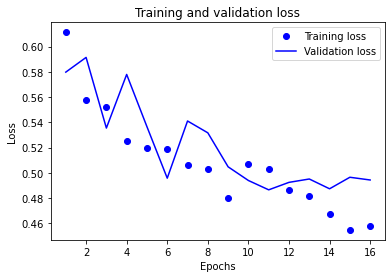

In [313]:
import matplotlib.pyplot as plt

his_lstm_basic_dic = lstm_basic.history
loss = his_lstm_basic_dic['loss']
val_loss = his_lstm_basic_dic['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


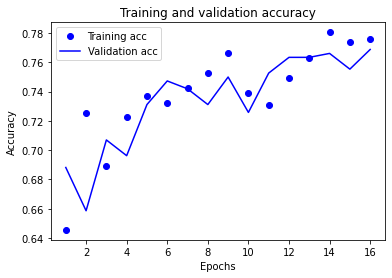

In [314]:
plt.clf() # 그래프를 초기화합니다.
acc = his_lstm_basic_dic['accuracy']
val_acc = his_lstm_basic_dic['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## RNN Model

In [165]:
# SimpleRNN
from tensorflow.keras.layers import SimpleRNN
#output, hidden state, cell state
model = Sequential() # Sequeatial Model 
model.add(SimpleRNN(32, input_shape=(12, 4999))) # hidden_nodes # (timestep, feature) 
model.add(Dense(1,activation = 'sigmoid')) # output = 1 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) # adam / sgd
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 32)                161024    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 161,057
Trainable params: 161,057
Non-trainable params: 0
_________________________________________________________________


In [166]:
# over sampling 적용 
earlystopping = EarlyStopping(monitor='valloss',  # 모니터 기준 설정 (val loss) 
                              patience=3,         # 3 Epoch동안 개선되지 않는다면 종료
                             )
SRNN_model = model.fit(x_train_v, y_train_v,epochs=50,
          batch_size = 63, verbose=1, # 30 
          validation_data=(x_test_v,y_test_v),
          callbacks=[early_stop])

Epoch 1/50
14/14 [==============================] - 1s 60ms/step - loss: 0.5913 - accuracy: 0.7252 - val_loss: 0.6255 - val_accuracy: 0.7366
Epoch 2/50
14/14 [==============================] - 1s 48ms/step - loss: 0.4916 - accuracy: 0.7794 - val_loss: 0.6101 - val_accuracy: 0.7016
Epoch 3/50
14/14 [==============================] - 1s 47ms/step - loss: 0.4498 - accuracy: 0.7875 - val_loss: 0.5916 - val_accuracy: 0.7500
Epoch 4/50
14/14 [==============================] - 1s 50ms/step - loss: 0.4151 - accuracy: 0.8314 - val_loss: 0.5813 - val_accuracy: 0.7608
Epoch 5/50
14/14 [==============================] - 1s 48ms/step - loss: 0.3972 - accuracy: 0.8303 - val_loss: 0.5849 - val_accuracy: 0.7473
Epoch 6/50
14/14 [==============================] - 1s 48ms/step - loss: 0.3800 - accuracy: 0.8464 - val_loss: 0.5659 - val_accuracy: 0.7500
Epoch 7/50
14/14 [==============================] - 1s 49ms/step - loss: 0.3646 - accuracy: 0.8545 - val_loss: 0.5557 - val_accuracy: 0.7688
Epoch 8/50
14

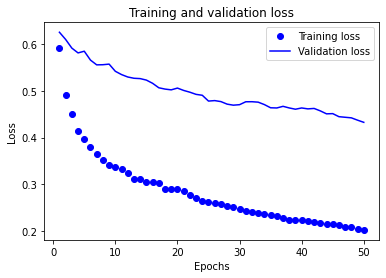

In [168]:
his_SRNN_dic = SRNN_model.history
loss = his_SRNN_dic['loss']
val_loss = his_SRNN_dic['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

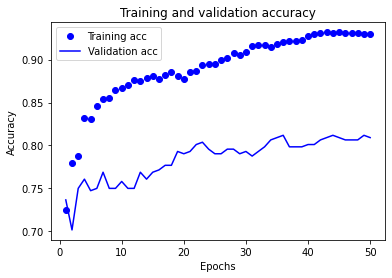

In [169]:
plt.clf() # 그래프를 초기화합니다.
acc = his_SRNN_dic['accuracy']
val_acc = his_SRNN_dic['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [185]:
model.evaluate(test_list_a,y_test)

9/9 [==============================] - 0s 10ms/step - loss: 1.0551 - accuracy: 0.5097


[1.05509614944458, 0.5097275972366333]